In [32]:
import pandas as pd

In [33]:
questions = pd.read_pickle('bench-df.pkl').reset_index()

In [34]:
index_metrics = pd.read_pickle(r'E:\indres\bench1.pkl')

In [35]:
retriv_result = pd.read_pickle(r'E:\results\bench_rel.pkl')

In [36]:
r_q = pd.merge(retriv_result, questions, left_on='question', right_on='index')

In [37]:
final = pd.merge(r_q, index_metrics, on='file')

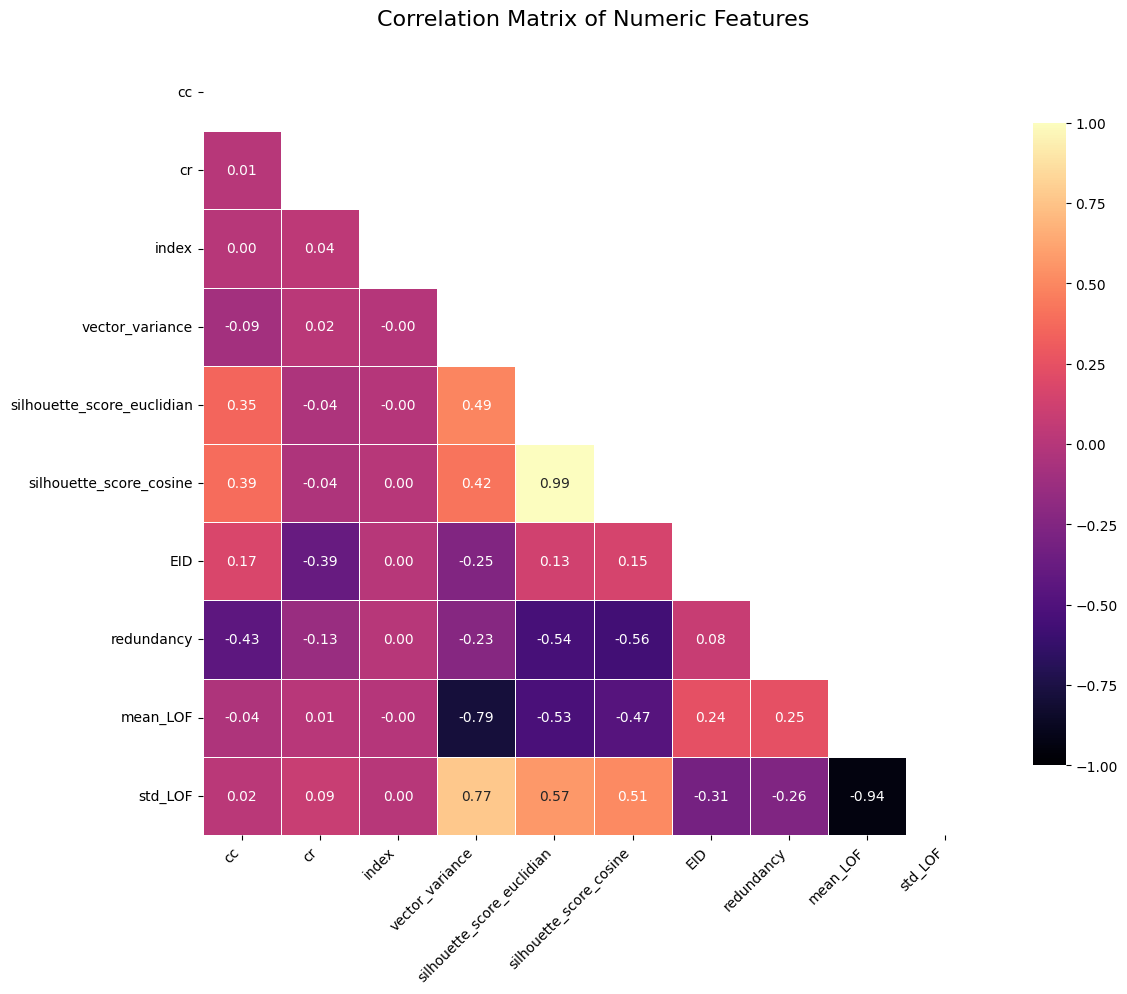

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(df):
    """
    Plot a beautiful correlation matrix for all numeric columns in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): Input dataframe containing numeric columns
    """
    # Calculate correlation matrix for numeric columns only
    numeric_df = df.select_dtypes(include=[np.number])
    corr = numeric_df.corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Create heatmap with magma colormap
    sns.heatmap(corr, 
                mask=mask,
                cmap='magma',
                vmin=-1, vmax=1,
                center=0,
                annot=True,
                fmt='.2f',
                linewidths=0.5,
                cbar_kws={'shrink': 0.8},
                square=True)
    
    # Add title and adjust layout
    plt.title('Correlation Matrix of Numeric Features', 
              fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    
    # Make the plot tight
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage:
# plot_correlation_matrix(final[final['file'].str.contains('DeepPavlov')])
plot_correlation_matrix(final)